#Unzip the file and store it a directory

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature.zip" -d "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature"

Archive:  /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature.zip
   creating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/
   creating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/buildings/
  inflating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/buildings/20057.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/buildings/20060.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/buildings/20061.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/202303_DL Modul

#Training & Testing Folder

In [ ]:
train_dir =  "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test"

In [ ]:
#check number of image in folder
import os

In [ ]:
subdirs = [f.path for f in os.scandir(train_dir) if f.is_dir()]

# Get the names of the subdirectories
subdir_names = [os.path.basename(subdir) for subdir in subdirs]

# Print the names of the subdirectories
print('Subdirectory names:', subdir_names)

Subdirectory names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
# Define a counter for the number of images
total_train_data = 0

for folder in subdir_names:
  train_cat_path = train_dir +'/'+ folder

  num_images = 0

  for filename in os.listdir(train_cat_path):
      # Check if the file is an image file
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
          # Increment the counter
          num_images += 1

  # Print the number of images
  print('Number of image in ',folder, ': ' ,num_images)
  total_train_data += num_images
print('Total:', total_train_data)

Number of image in  buildings :  210
Number of image in  forest :  480
Number of image in  glacier :  480
Number of image in  mountain :  510
Number of image in  sea :  510
Number of image in  street :  510
Total: 2700


In [ ]:
subdirs = [f.path for f in os.scandir(test_dir) if f.is_dir()]

# Get the names of the subdirectories
subdir_names = [os.path.basename(subdir) for subdir in subdirs]

# Print the names of the subdirectories
print('Subdirectory names:', subdir_names)

Subdirectory names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
# Define a counter for the number of images
total_test_data = 0

for folder in subdir_names:
  test_cat_path = test_dir +'/'+ folder

  num_images = 0

  for filename in os.listdir(test_cat_path):
      # Check if the file is an image file
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
          # Increment the counter
          num_images += 1

  # Print the number of images
  print('Number of image in ',folder, ': ' ,num_images)
  total_test_data += num_images
print('Total:', total_test_data)

Number of image in  buildings :  74
Number of image in  forest :  93
Number of image in  glacier :  93
Number of image in  mountain :  90
Number of image in  sea :  96
Number of image in  street :  90
Total: 536


In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import seaborn as sns
import cv2
from pathlib import Path
import fastai.vision

In [ ]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = Path(train_dir)
path.ls()

(#6) [Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/buildings'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/forest'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/glacier'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/mountain'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/sea'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_train/seg_train/street')]

In [ ]:
test_path = Path(test_dir)
test_path.ls()

(#6) [Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/buildings'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/forest'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/glacier'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/mountain'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/sea'),Path('/content/drive/MyDrive/Colab Notebooks/202303_DL Module/Lab Dataset/nature/nature/seg_test/seg_test/street')]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(path,
                                                   target_size=(100, 100),
                                                   batch_size=200,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 2700 images belonging to 6 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                             target_size=(100, 100),
                                                             batch_size=200,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 536 images belonging to 6 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


In [ ]:
import keras 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

#Architecture 1_CNN

In [ ]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation = 'relu', input_shape= (100,100,3), padding = 'valid'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate = 0.1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate = 0.1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add (Dense(64, activation ='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history =  model.fit(train_generator, epochs = 20,verbose=2, validation_data = validation_generator)

<Figure size 640x480 with 0 Axes>

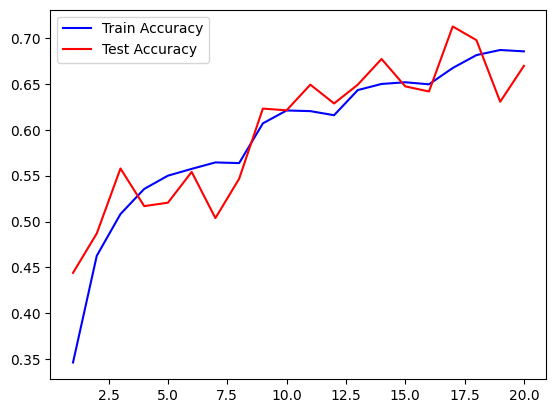

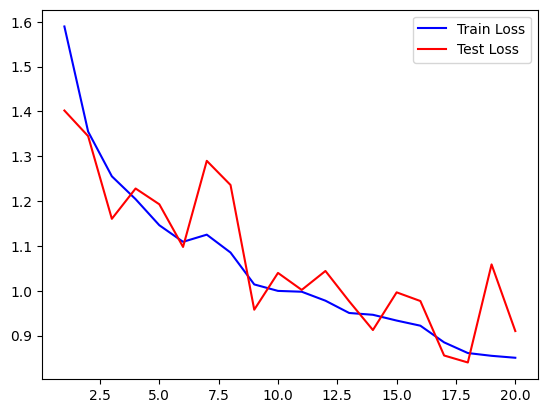

<Figure size 640x480 with 0 Axes>

In [ ]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()